<a href="https://colab.research.google.com/github/DerNiccoo/TheEarlyBird/blob/main/Aufgabe1/Alina/Assignment1_TheEarlyBird.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


In [2]:
device = torch.device("cpu")
#device = torch.device("cuda:0")


In [14]:
n_epochs = 50
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10

random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

In [15]:
#Load the data
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)

In [35]:
class TwoLayerNet(torch.nn.Module):
    def __init__(self, D_in, H, D_out):
        super(TwoLayerNet, self).__init__()
        self.linear1 = torch.nn.Linear(D_in, H)
        self.linear2 = torch.nn.Linear(H, D_out)

    def forward(self, x):
        x = x.view(-1, 784)
        h_relu = self.linear1(x).clamp(min=0)
        y_pred = self.linear2(h_relu)
        return y_pred
        #return F.log_softmax(y_pred)

In [31]:
#Arrays for plotting the loss
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

#Training 
def train(epoch, loss_function):
  model.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = model(data)
    loss = loss_function(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % log_interval == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))
      train_losses.append(loss.item())
      train_counter.append(
        (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
      torch.save(model.state_dict(), '/model.pth')
      torch.save(optimizer.state_dict(), '/optimizer.pth')
      

In [32]:
#Testing 
def test(loss_function):
  model.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      output = model(data)
      test_loss += loss_function(output, target, size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

In [12]:
#Test with LogSoftmax, negative loglikelihood loss, hidden_layer size 100, epochs = 50 

#1 Construct our model 
N, D_in, H, D_out = 64, 784, 100, 10
model = TwoLayerNet(D_in, H, D_out)
optimizer = optim.SGD(model.parameters(), lr=learning_rate,
                      momentum=momentum)

#2 Training and Test 
test(F.nll_loss)
for epoch in range(1, n_epochs + 1):
  train(epoch, F.nll_loss)
  test(F.nll_loss)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Avg. loss: 2.3639, Accuracy: 916/10000 (9%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.368751
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.097639
Train Epoch: 1 [1280/60000 (2%)]	Loss: 1.854285
Train Epoch: 1 [1920/60000 (3%)]	Loss: 1.504753
Train Epoch: 1 [2560/60000 (4%)]	Loss: 1.171025
Train Epoch: 1 [3200/60000 (5%)]	Loss: 1.076203
Train Epoch: 1 [3840/60000 (6%)]	Loss: 0.940794
Train Epoch: 1 [4480/60000 (7%)]	Loss: 0.815673
Train Epoch: 1 [5120/60000 (9%)]	Loss: 0.748180
Train Epoch: 1 [5760/60000 (10%)]	Loss: 0.681074
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.817642
Train Epoch: 1 [7040/60000 (12%)]	Loss: 0.770021
Train Epoch: 1 [7680/60000 (13%)]	Loss: 0.453931
Train Epoch: 1 [8320/60000 (14%)]	Loss: 0.459974
Train Epoch: 1 [8960/60000 (15%)]	Loss: 0.448907
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.575557
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.421187
Train Epoch: 1 [10880/60000 (18%)]	Loss: 0.471190
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.510739
Train Epoch: 1 [12160/6

In [33]:
#Test with LogSoftmax, negative loglikelihood loss, hidden_layer size 20, epochs = 50 

#1 Construct our model 
N, D_in, H, D_out = 64, 784, 20, 10
model = TwoLayerNet(D_in, H, D_out)
optimizer = optim.SGD(model.parameters(), lr=learning_rate,
                      momentum=momentum)

#2 Training and Test 
test(F.nll_loss)
for epoch in range(1, n_epochs + 1):
  train(epoch, F.nll_loss)
  test(F.nll_loss)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Avg. loss: 2.3296, Accuracy: 661/10000 (7%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.336544
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.062002
Train Epoch: 1 [1280/60000 (2%)]	Loss: 1.902766
Train Epoch: 1 [1920/60000 (3%)]	Loss: 1.680778
Train Epoch: 1 [2560/60000 (4%)]	Loss: 1.399138
Train Epoch: 1 [3200/60000 (5%)]	Loss: 1.405429
Train Epoch: 1 [3840/60000 (6%)]	Loss: 1.273472
Train Epoch: 1 [4480/60000 (7%)]	Loss: 0.997632
Train Epoch: 1 [5120/60000 (9%)]	Loss: 0.829131
Train Epoch: 1 [5760/60000 (10%)]	Loss: 0.983858
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.825041
Train Epoch: 1 [7040/60000 (12%)]	Loss: 0.738081
Train Epoch: 1 [7680/60000 (13%)]	Loss: 0.809931
Train Epoch: 1 [8320/60000 (14%)]	Loss: 0.617343
Train Epoch: 1 [8960/60000 (15%)]	Loss: 0.535800
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.564726
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.691790
Train Epoch: 1 [10880/60000 (18%)]	Loss: 0.440069
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.500973
Train Epoch: 1 [12160/6

In [34]:
#Test with CrossEntropyLoss, hidden_layer size 100, epochs = 50 

#1 Construct our model 
N, D_in, H, D_out = 64, 784, 100, 10
model = TwoLayerNet(D_in, H, D_out)
optimizer = optim.SGD(model.parameters(), lr=learning_rate,
                      momentum=momentum)

#2 Training and Test 
test(F.cross_entropy)
for epoch in range(1, n_epochs + 1):
  train(epoch, F.cross_entropy)
  test(F.cross_entropy)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Avg. loss: 2.3141, Accuracy: 1001/10000 (10%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.323180
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.111132
Train Epoch: 1 [1280/60000 (2%)]	Loss: 1.812682
Train Epoch: 1 [1920/60000 (3%)]	Loss: 1.428987
Train Epoch: 1 [2560/60000 (4%)]	Loss: 1.296322
Train Epoch: 1 [3200/60000 (5%)]	Loss: 1.119666
Train Epoch: 1 [3840/60000 (6%)]	Loss: 0.781458
Train Epoch: 1 [4480/60000 (7%)]	Loss: 0.737772
Train Epoch: 1 [5120/60000 (9%)]	Loss: 0.765172
Train Epoch: 1 [5760/60000 (10%)]	Loss: 0.688632
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.851347
Train Epoch: 1 [7040/60000 (12%)]	Loss: 0.634968
Train Epoch: 1 [7680/60000 (13%)]	Loss: 0.600843
Train Epoch: 1 [8320/60000 (14%)]	Loss: 0.500115
Train Epoch: 1 [8960/60000 (15%)]	Loss: 0.568205
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.560888
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.357553
Train Epoch: 1 [10880/60000 (18%)]	Loss: 0.635922
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.421082
Train Epoch: 1 [12160

Text(0, 0.5, 'negative log likelihood loss')

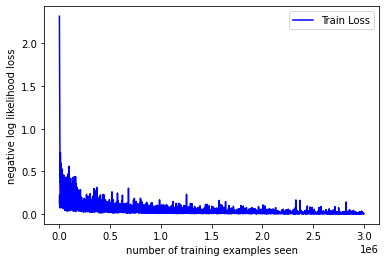

In [ ]:
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
